<a target="_blank" href="https://colab.research.google.com/github/Techtonique/learningmachine_python/blob/main/learningmachine/demo/thierrymoudiki_20240508_calib.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# 0 - Install and load packages

In [16]:
#%load_ext rpy2.ipython # Load R magic only if necessary (if pip install below doesn't work)

In [17]:
#%%R # Install the learningmachine package only if necessary (if pip install below doesn't work)

#utils::install.packages("c('remotes', 'ranger')")
#remotes::install_github("Techtonique/learningmachine")

In [18]:
!pip install ../.. --upgrade --no-cache-dir --verbose

Using pip 24.0 from /Users/t/Documents/Python_Packages/learningmachine/venv/lib/python3.11/site-packages/pip (python 3.11)
Processing /Users/t/Documents/Python_Packages/learningmachine
  Preparing metadata (setup.py) ...   Running command python setup.py egg_info
  /usr/local/bin/R
  R is already installed on macOS.
  No installation needed.
  Erreur : objet 'devtools' introuvable
  Exécution arrêtée
  Erreur dans contrib.url(repos, "source") :
    essai d'utilisation de CRAN sans fixer un miroir
  Appels : <Anonymous> -> contrib.url
  Exécution arrêtée
  essai de l'URL 'https://techtonique.r-universe.dev/bin/macosx/big-sur-x86_64/contrib/4.3/learningmachine_1.1.0.tgz'
  Content type 'application/x-gzip' length 1638215 bytes (1.6 MB)
  downloaded 1.6 MB


  Les packages binaires téléchargés sont dans
        /var/folders/cp/q8d6040n3m38d22z3hkk1zc40000gn/T//Rtmp0kSdk3/downloaded_packages
  running egg_info
  creating /private/var/folders/cp/q8d6040n3m38d22z3hkk1zc40000gn/T/pip-pip-egg-

In [19]:
import learningmachine as lm
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer, load_wine, load_iris, load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from time import time

# 1 - Adjust classifiers

**breast cancer**

Elapsed time:  0.538240909576416
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        36
           1       0.97      0.91      0.94        78

    accuracy                           0.92       114
   macro avg       0.90      0.93      0.91       114
weighted avg       0.93      0.92      0.92       114



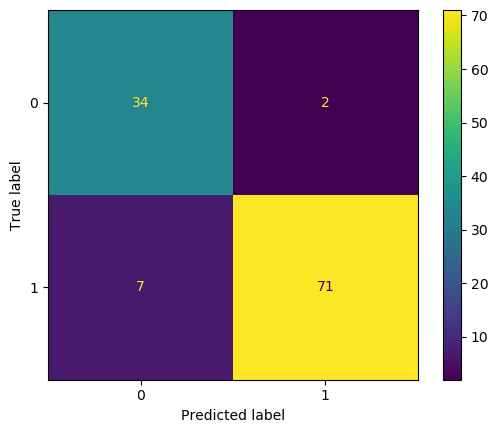

In [20]:
fit_obj = lm.Classifier(method = "ranger", level=None, nb_hidden=None) # Random Forest
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=13)

start = time()
fit_obj.fit(X_train, y_train)
print("Elapsed time: ", time() - start)
preds = fit_obj.predict(X_test)
score = np.mean(preds.ravel().astype(int) == y_test)

print(classification_report(y_test, preds.ravel().astype(int)))

ConfusionMatrixDisplay.from_predictions(y_test, preds.ravel().astype(int))
plt.show()

In [21]:
fit_obj.summary(X=X_test,
                y=y_test, 
                class_index = 0,   
                level = 95,)

TypeError: Base.summary() got an unexpected keyword argument 'class_index'

In [ ]:
fit_obj = lm.Classifier(method = "ranger", level=None, nb_hidden=25) # Random Forest
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=13)

start = time()
fit_obj.fit(X_train, y_train)
print("Elapsed time: ", time() - start)
score = np.mean(fit_obj.predict(X_test).ravel().astype(int) == y_test)

print(classification_report(y_test, preds.ravel().astype(int)))

ConfusionMatrixDisplay.from_predictions(y_test, preds.ravel().astype(int))
plt.show()

In [ ]:
fit_obj = lm.Classifier(method = "ranger", level=95, nb_hidden=0) # Random Forest
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=13)

start = time()
fit_obj.fit(X_train, y_train)
print("Elapsed time: ", time() - start)
preds = fit_obj.predict(X_test)
score = np.mean(preds.ravel().astype(int) == y_test)

print(classification_report(y_test, preds.ravel().astype(int)))

ConfusionMatrixDisplay.from_predictions(y_test, preds.ravel().astype(int))
plt.show()

In [ ]:
fit_obj = lm.Classifier(method = "ranger", level=95, nb_hidden=25) # Random Forest
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=13)

start = time()
fit_obj.fit(X_train, y_train)
print("Elapsed time: ", time() - start)
preds = fit_obj.predict(X_test)
score = np.mean(preds.ravel().astype(int) == y_test)

print(classification_report(y_test, preds.ravel().astype(int)))

ConfusionMatrixDisplay.from_predictions(y_test, preds.ravel().astype(int))
plt.show()

In [ ]:
fit_obj = lm.Classifier(method = "krr", level=95, nb_hidden=25) # Kernel Ridge Regression
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=13)

start = time()
fit_obj.fit(X_train, y_train)
print("Elapsed time: ", time() - start)
preds = fit_obj.predict(X_test)
score = np.mean(preds.ravel().astype(int) == y_test)

print(classification_report(y_test, preds.ravel().astype(int)))

ConfusionMatrixDisplay.from_predictions(y_test, preds.ravel().astype(int))
plt.show()

**iris**

In [ ]:
dataset = load_iris()
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=13)

fit_obj = lm.Classifier(method = "ranger", level=None, nb_hidden=None) # Random Forest
start = time()
fit_obj.fit(X_train, y_train)
print("Elapsed time: ", time() - start)
preds = fit_obj.predict(X_test)
score = np.mean(preds.ravel().astype(int) == y_test)
print(classification_report(y_test, preds.ravel().astype(int)))
ConfusionMatrixDisplay.from_predictions(y_test, preds.ravel().astype(int))
plt.show()


fit_obj = lm.Classifier(method = "ranger", level=None, nb_hidden=25)
start = time()
fit_obj.fit(X_train, y_train)
print("Elapsed time: ", time() - start)
score = np.mean(fit_obj.predict(X_test).ravel().astype(int) == y_test)
print(classification_report(y_test, preds.ravel().astype(int)))
ConfusionMatrixDisplay.from_predictions(y_test, preds.ravel().astype(int))
plt.show()

fit_obj = lm.Classifier(method = "ranger", level=95, nb_hidden=0) # Random Forest
start = time()
fit_obj.fit(X_train, y_train)
print("Elapsed time: ", time() - start)
preds = fit_obj.predict(X_test)
score = np.mean(preds.ravel().astype(int) == y_test)
print(classification_report(y_test, preds.ravel().astype(int)))
ConfusionMatrixDisplay.from_predictions(y_test, preds.ravel().astype(int))
plt.show()

fit_obj = lm.Classifier(method = "ranger", level=95, nb_hidden=25) # Random Forest
start = time()
fit_obj.fit(X_train, y_train)
print("Elapsed time: ", time() - start)
preds = fit_obj.predict(X_test)
score = np.mean(preds.ravel().astype(int) == y_test)
print(classification_report(y_test, preds.ravel().astype(int)))
ConfusionMatrixDisplay.from_predictions(y_test, preds.ravel().astype(int))
plt.show()

In [ ]:
fit_obj = lm.Classifier(method = "krr", level=95, nb_hidden=25) # Kernel Ridge Regression
start = time()
fit_obj.fit(X_train, y_train)
print("Elapsed time: ", time() - start)
preds = fit_obj.predict(X_test)
score = np.mean(preds.ravel().astype(int) == y_test)
print(classification_report(y_test, preds.ravel().astype(int)))
ConfusionMatrixDisplay.from_predictions(y_test, preds.ravel().astype(int))
plt.show()

**wine**

In [ ]:
dataset = load_wine()
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=13)

fit_obj = lm.Classifier(method = "ranger", level=None, nb_hidden=None) # Random Forest
start = time()
fit_obj.fit(X_train, y_train)
print("Elapsed time: ", time() - start)
preds = fit_obj.predict(X_test)
score = np.mean(preds.ravel().astype(int) == y_test)
print(classification_report(y_test, preds.ravel().astype(int)))


fit_obj = lm.Classifier(method = "ranger", level=None, nb_hidden=25) # Random Forest
start = time()
fit_obj.fit(X_train, y_train)
print("Elapsed time: ", time() - start)
score = np.mean(fit_obj.predict(X_test).ravel().astype(int) == y_test)
print(classification_report(y_test, preds.ravel().astype(int)))

fit_obj = lm.Classifier(method = "ranger", level=95, nb_hidden=0) # Random Forest
start = time()
fit_obj.fit(X_train, y_train)
print("Elapsed time: ", time() - start)
preds = fit_obj.predict(X_test)
score = np.mean(preds.ravel().astype(int) == y_test)
print(classification_report(y_test, preds.ravel().astype(int)))

fit_obj = lm.Classifier(method = "ranger", level=95, nb_hidden=25) # Random Forest
start = time()
fit_obj.fit(X_train, y_train)
print("Elapsed time: ", time() - start)
preds = fit_obj.predict(X_test)
score = np.mean(preds.ravel().astype(int) == y_test)
print(classification_report(y_test, preds.ravel().astype(int)))
ConfusionMatrixDisplay.from_predictions(y_test, preds.ravel().astype(int))
plt.show()

In [ ]:
fit_obj = lm.Classifier(method = "krr", level=95, nb_hidden=25) # Kernel Ridge Regression
start = time()
fit_obj.fit(X_train, y_train)
print("Elapsed time: ", time() - start)
preds = fit_obj.predict(X_test)
score = np.mean(preds.ravel().astype(int) == y_test)
print(classification_report(y_test, preds.ravel().astype(int)))
ConfusionMatrixDisplay.from_predictions(y_test, preds.ravel().astype(int))
plt.show()